In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

sys.path.append('../profiles/')
from symmetric_attractor_profile import attractor_profile
sys.path.append('../analysis/')
from holes_analysis import holes_data, holes_analysis

In [2]:
parent = '/home/emmetth/gravity_sim'
os.chdir(parent)
full_path = parent+'/sim_data/feature_matching/'

PS = holes_data(data_dir=full_path)
data = PS.data

In [5]:
hrs = sorted(PS.hrs)
edges = sorted(PS.from_edges)

In [63]:
p0 = 7,edges[0],hrs[0],20.0,5.0
FM0 = holes_analysis(data, p0)

FM0.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10, verbose=True)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 2.748e-25  1.637e-25   5.123e-26
Yukawa:
l=10.00um: 7.430e-26  1.919e-26   1.258e-26
l=50.00um: 2.489e-25  1.276e-25   4.594e-26



array([[  2.74816551e-25,   1.63658054e-25,   5.12271501e-26],
       [  7.43019434e-26,   1.91901180e-26,   1.25805990e-26],
       [  2.48874739e-25,   1.27600232e-25,   4.59369711e-26]])

In [57]:
harms_rad = np.zeros((len(edges), len(hrs), 3))
sep, height = 20.0,5.0

for i,edge in enumerate(edges):
    for j,hr in enumerate(hrs):
        p = 7,edge,hr,sep,height
        FM = holes_analysis(data, p)
        harms = FM.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        harms_rad[i,j,:] = harms[:,0]

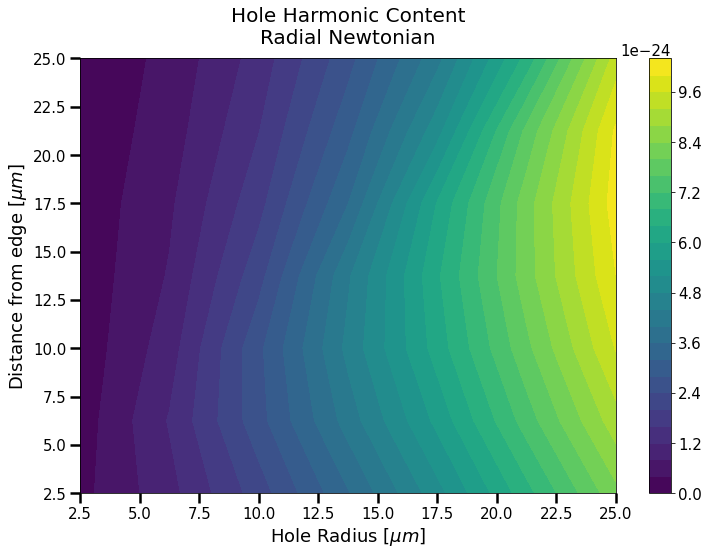

In [64]:
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(edges, hrs, harms_rad[:,:,0], levels=25)
plt.colorbar()
plt.ylabel('Distance from edge [$\mu m$]', fontsize=18)
plt.xlabel('Hole Radius [$\mu m$]', fontsize=18)
plt.title('Hole Harmonic Content\nRadial Newtonian', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('dist_radius.png', dpi=150)
plt.show()

In [72]:
# np.save('square_slots_harm_rad.npy', harms_rad)

This is not at all what I expected, but it makes sense as the absolute magnitude increases with both hole size and distance from edge, so to see the feature matching in a colorbar one would need to normalize the peaks to each other or something similar.

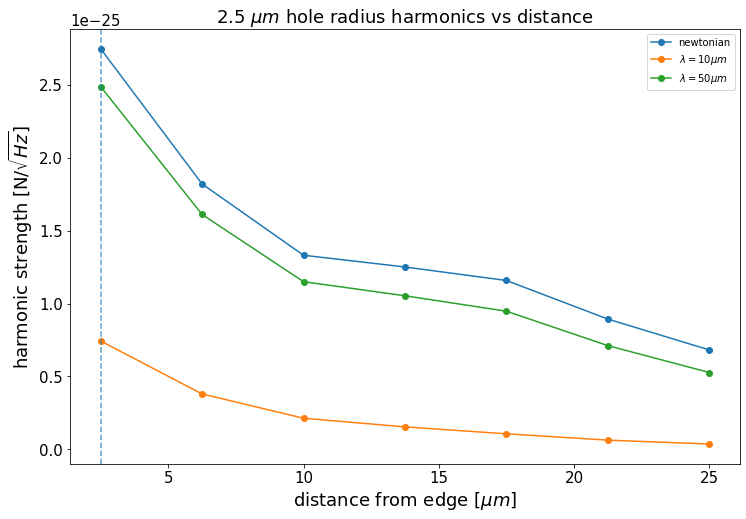

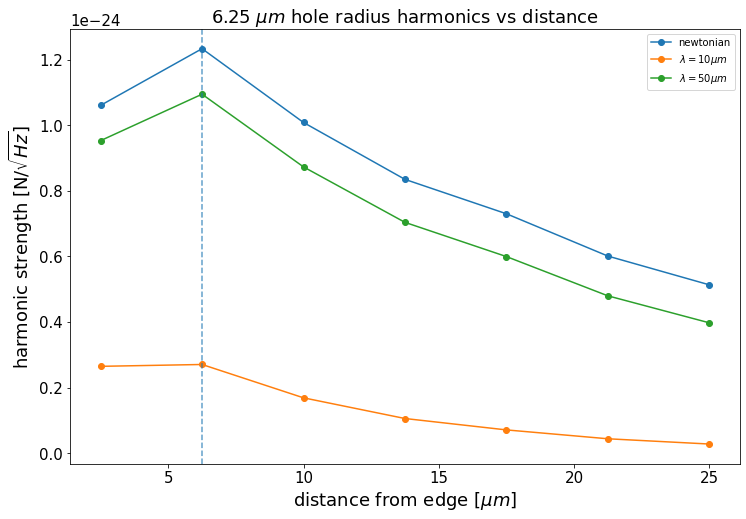

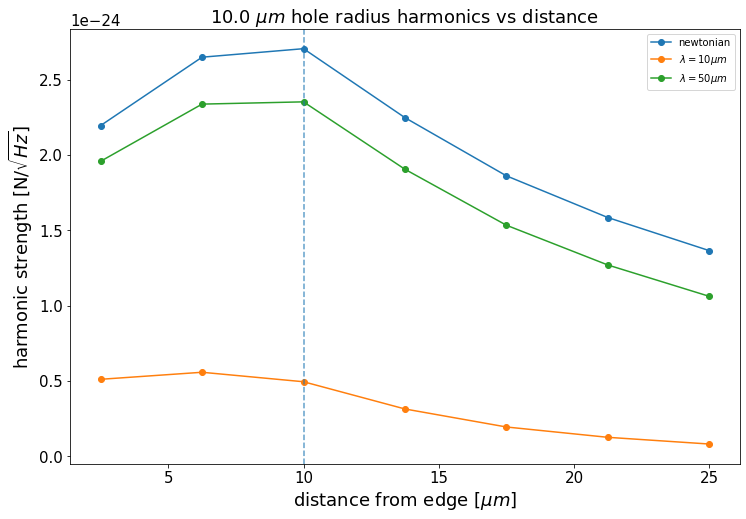

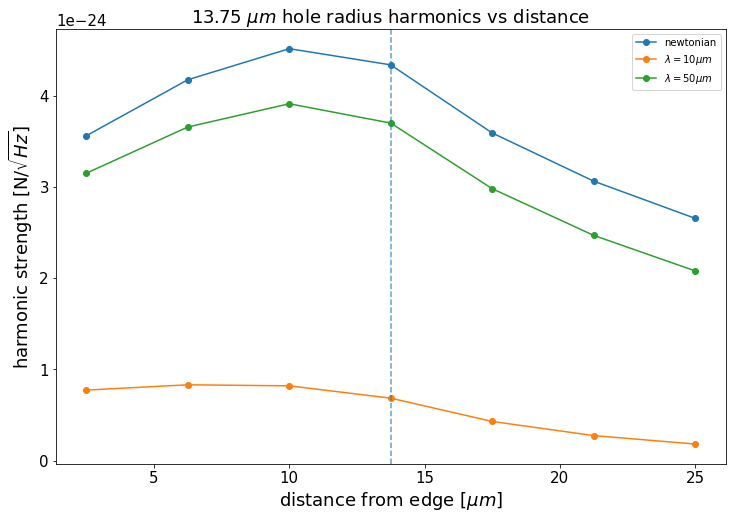

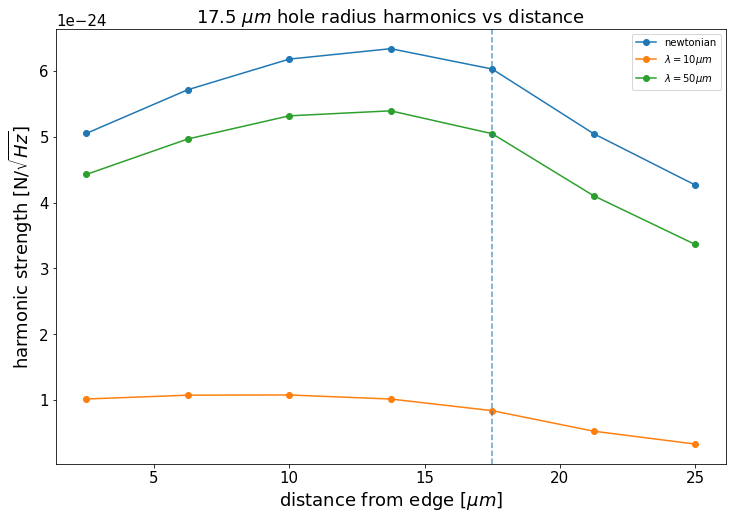

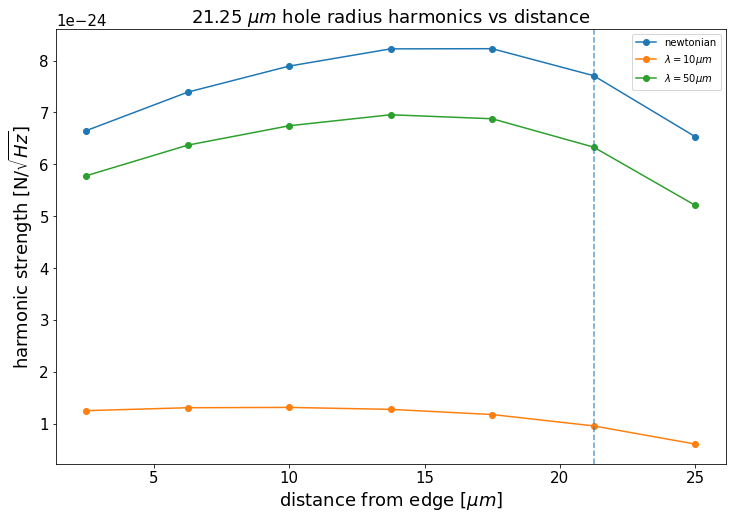

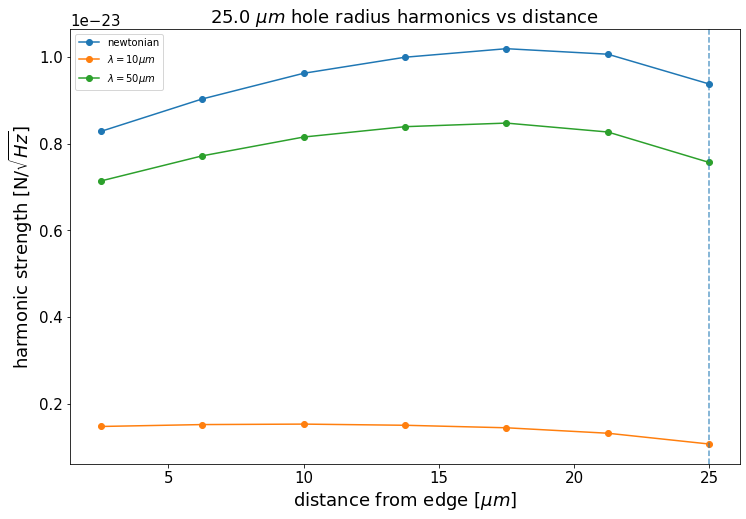

In [89]:
for i,hr in enumerate(hrs):
    plt.plot(edges, harms_rad[:,i,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('distance from edge [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.axvline(hr, ls='--', alpha=0.7)
    plt.title(f'{hr} $\mu m$ hole radius harmonics vs distance', fontsize=18, y=1)
    # plt.savefig(f'feature_matching_plots/{hr}.png', dpi=150)
    plt.show()

In [60]:
max_25 = intp.interp1d(edges, harms_rad[:,-1,0], kind='cubic')
dists = np.linspace(2.5, 25, 100)

dists[np.argmax(max_25(dists))]

18.18181818181818

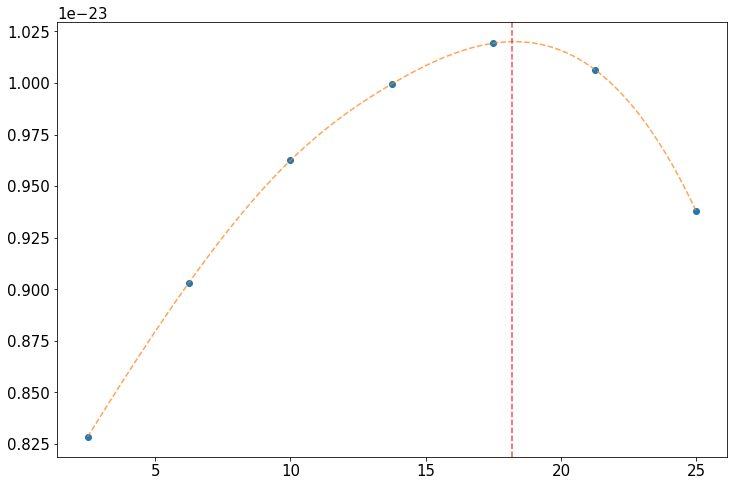

In [61]:
plt.plot(edges, harms_rad[:,-1,0], 'o')
plt.plot(dists, max_25(dists), '--', alpha=0.7)
plt.axvline(18.18, ls='--', alpha=0.7, c='r')

It's looking like the signal increase from increasing the radius overpowers the variation around the maximum from changing the distance from the attractor edge. For this feature-matching to be useful, you'd want to have two different sized holes two distances from the edge to "target" different signals thus they'd have to not overlap, but it looks like the larger holes overpower this in overall signal strength. Need to disucss here.

See below, looks like harmonic strength $\propto$ $R^2$ or similar, at least close to zero...

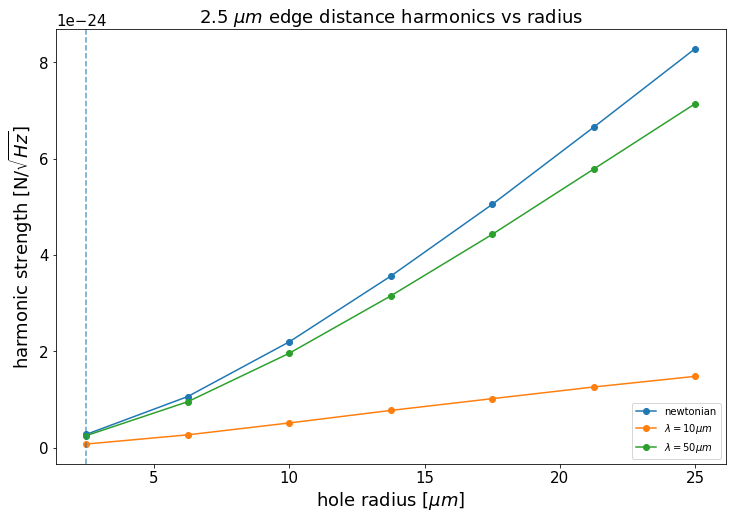

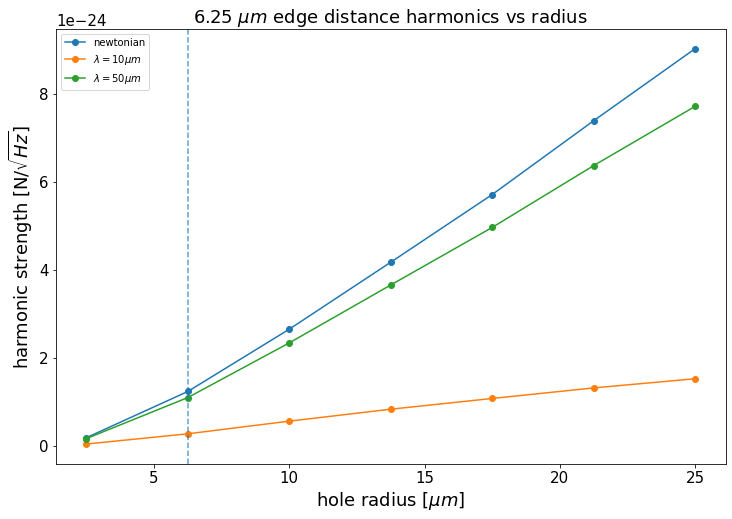

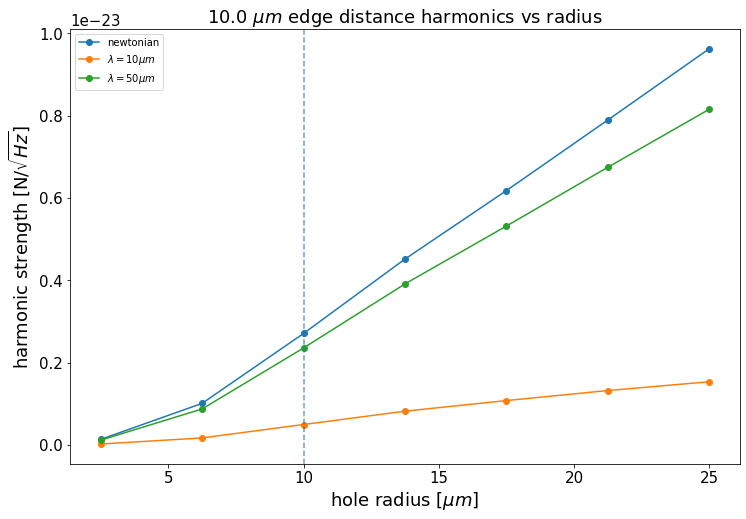

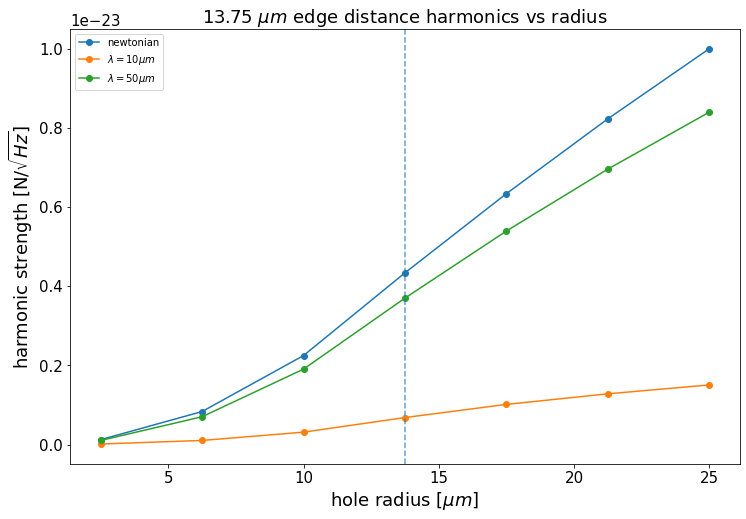

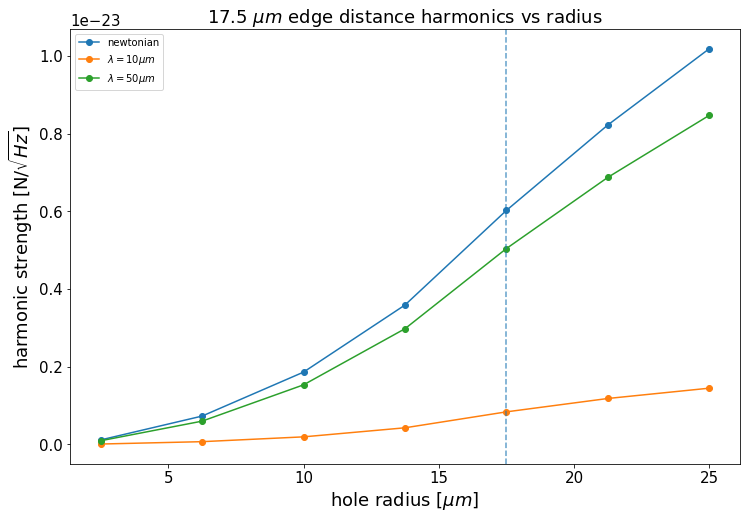

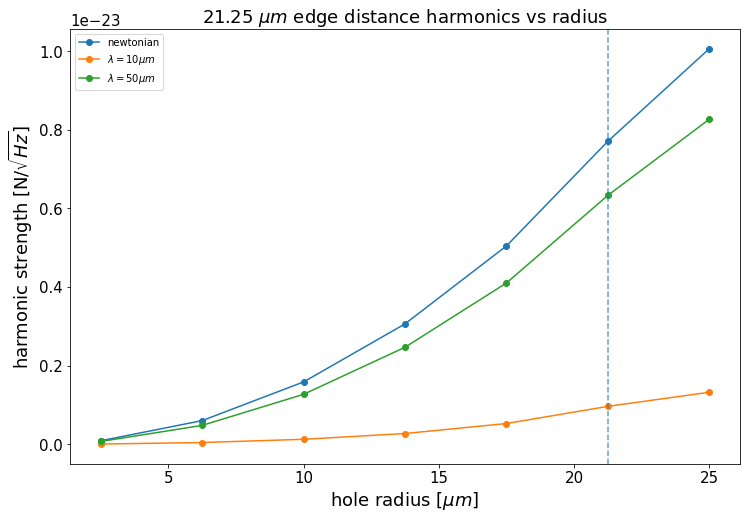

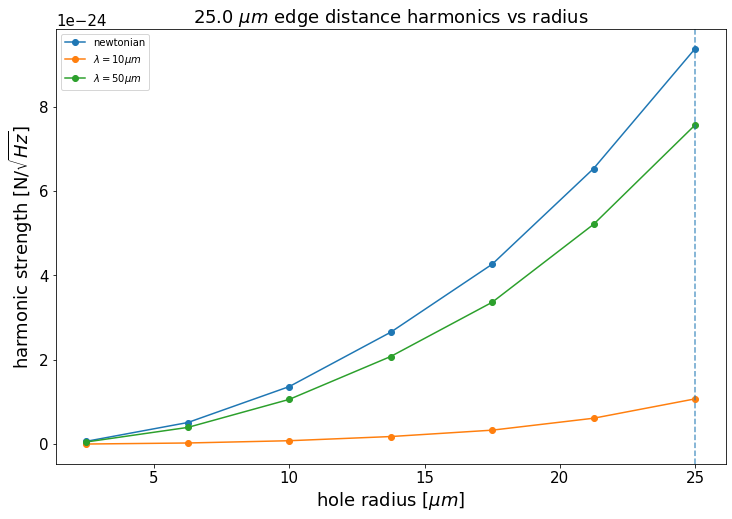

In [90]:
for i,edge in enumerate(edges):
    plt.plot(edges, harms_rad[i,:,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('hole radius [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.axvline(edge, ls='--', alpha=0.7)
    plt.title(f'{edge} $\mu m$ edge distance harmonics vs radius', fontsize=18)
    # plt.savefig(f'feature_matching_plots/radius/{edge}.png', dpi=150)
    plt.show()